# PHÂN TÍCH DỮ LIỆU BẰNG CÁCH SỬ DỤNG DỮ LIỆU VỀ VIDEOS YOUTUBE TỪ CÁC KÊNH PHỔ BIẾN LÀM VỀ NỘI DUNG ROBLOX

# 1. Mục đích

## 1.1. Giới thiệu

Được thành lập vào năm 2005, Youtube đã phát triển thành công cụ tìm kiếm lớn thứ hai trên thế giới (chỉ sau Google) xử lý hơn 3 tỷ lượt tìm kiếm mỗi tháng. [[1]](https://www.mushroomnetworks.com/infographics/youtube---the-2nd-largest-search-engine-infographic/). Tuy nhiên, cách thức hoạt động của thuật toán Youtube, yếu tố khiến video nhận được nhiều lượt xem và được đề xuất hơn video khác nhìn chung vẫn là một điều bí ẩn. Thực tế, Youtube sở hữu một trong những hệ thống đề xuất của ngành công nghiệp tinh vi và có quy mô lớn nhất hiện nay. [[2]](https://dl.acm.org/doi/10.1145/2959100.2959190). Đối với những nhà sáng tạo nội dung mới, việc hiểu lý do tại sao một video có nhiều lượt xem còn video khác thì không là một thách thức. Có rất nhiều "lầm tưởng" xung quanh sự thành công của video trên Youtube [[3]](https://vidiq.com/blog/post/5-youtube-algorithm-myths-youtubers-need-to-know-about/), ví dụ như video có nhiều lượt thích hoặc bình luận hơn, hoặc video có thời lượng nhất định. Thực hiện thử nghiệm và tìm kiếm "xu hướng" trong các chủ đề mà các kênh Youtube đang đề cập đến trong một phân khúc nhất định cũng rất hữu ích.

Dự án có thể sẽ có hữu ích cho các nhà sáng tạo nội dung mới khác. Phạm vi của dự án này được giới hạn trong các kênh Youtube về nội dung Roblox (có thể có đặc điểm và đối tượng khán giả khác nhau). Do đó, trong dự án này, khám phá số liệu thống kê của khoảng 10 kênh Youtube về nội dung Roblox đang thu hút được nhiều lượt xem trên thị trường.

## 1.2. Mục tiêu

Trong dự án này, mình muốn khám phá những điều sau:

- Làm quen với Youtube API và cách lấy dữ liệu video: Học cách sử dụng Youtube API để truy xuất thông tin về các video trên nền tảng này.

- Phân tích dữ liệu video và kiểm chứng các "lầm tưởng" phổ biến: Kiểm tra tính chính xác của các quan niệm thường gặp về yếu tố khiến video thành công trên Youtube, ví dụ:
    - Số lượng lượt thích và bình luận có ảnh hưởng đến lượt xem video không?
    - Thời lượng video có ảnh hưởng đến lượt xem và tương tác (like/ comment) không?
    - Độ dài tiêu đề có ảnh hưởng đến lượt xem không?
    - Các video có hiệu suất tốt thường có bao nhiêu thẻ tag? Thẻ tag phổ biến giữa các video này là gì?
    - Xét trên tất cả các nhà sáng tạo nội dung, tần suất họ upload video mới là như thế nào? Vào những ngày nào trong tuần?
- Khám phá các chủ đề thịnh hành bằng kỹ thuật NLP (Xử lý ngôn ngữ tự nhiên):
    - Các chủ đề phổ biến nào đang được đề cập trong các video (ví dụ: sử dụng wordcloud cho tiêu đề video)? Wordcloud là hình ảnh đám mây từ khóa, thể hiện kích thước của từ càng lớn thì mức độ xuất hiện càng nhiều.
    - Những câu hỏi nào đang được đặt ra trong phần bình luận của video?

## 1.3. Các bước thực hiện projects
1. Thu thập Dữ Liệu Video lớn: Sử dụng Youtube API để lấy dữ liệu video từ 10 kênh Roblox hàng đầu (bao gồm các bước nhỏ: tạo khoá API nhà phát triển, yêu cầu dữ liệu và chuyển đổi dữ liệu trả về thành định dạng phù hợp cho phân tích).
2. Xử lý dữ liệu thô
3. Phân tích dữ liệu
4. Kết luận

## 1.4. Dataset

### Giới hạn của dữ liệu

Mặc dù là một tập dữ liệu thực tế và phù hợp cho nghiên cứu, nhưng việc lựa chọn 10 kênh Youtube hàng đầu để đưa vào nghiên cứu hoàn toàn dựa trên sự tim hiểu về các kênh trong lĩnh vực làm videos nội dung về chủ đề này và có thể không hoàn toàn chính xác. Định nghĩa "phổ biến" của mình chỉ dựa trên số lượng người đăng ký, nhưng cũng có các số liệu khác có thể được xem xét (ví dụ: lượt xem, mức độ tương tác). Trên Youtube có thể sẽ còn rất nhiều kênh phổ biến hơn, tuy nhiên projects này mình sử dụng dữ liệu từ các kênh này:

### Quyền riêng tư và bảo mật

Theo Hướng dẫn của Youtube API: https://developers.google.com/youtube/v3/getting-started , việc sử dụng Youtube API miễn phí với điều kiện ứng dụng của bạn gửi yêu cầu trong giới hạn hạn ngạch. "YouTube Data API sử dụng hạn ngạch để đảm bảo các nhà phát triển sử dụng dịch vụ theo đúng mục đích và không tạo ra các ứng dụng làm giảm chất lượng dịch vụ hoặc hạn chế quyền truy cập của người khác." Lượng hạn ngạch mặc định cho mỗi ứng dụng là 10.000 đơn vị mỗi ngày và bạn có thể yêu cầu thêm hạn ngạch bằng cách điền vào biểu mẫu gửi tới Dịch vụ Youtube API nếu đạt đến giới hạn.

Vì tất cả dữ liệu được yêu cầu từ Youtube API đều là dữ liệu công khai (mọi người trên Internet đều có thể xem trên Youtube) nên không sẽ không vi phạm quyền riêng tư của kênh. Ngoài ra, dữ liệu chỉ được lấy cho mục đích nghiên cứu trong trường hợp này và không phục vụ cho bất kỳ lợi ích thương mại nào.

In [1]:
pip install nltk

In [100]:
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

from IPython.display import JSON

# Thu viện Data visualization 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Google API
from googleapiclient.discovery import build

In [101]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Tạo dữ liệu với Youtube API

Lấy API key Youtube của cá nhân, lấy channel id của từng kênh

In [8]:
api_key = 'xxxxxxxxxxxxxxxxxxx' # Nhập api key cá nhân

channel_ids = ['UCTyC8MgBZhYrompfwfo-iqw', #Calixo
               'UC6iJijyc_13WMPtew7euhqQ', #O1G
               'UCFKwASpt-58XgabursEsHXQ', #LuTuTu 
               'UCIr-3f3uF3_884veAry6liQ', #Folix
               'UC6E0eYfOeBRNiEPFM7Ht9Dg', #Tappy
               'UCdvWE7xjoL-B1FS_NFwQqTw', #EYYCHEEV
               'UCyQ0PYhw4G-lF7EKMbwsw3g', #ZourChip
               'UC8QCyPNeBSruNtMuwTxGxJw', #Quimic
               'UCaYtt5pt9v_jD7195KXceZA', #B3LLA Brookhaven
               'UCEfQBAxGs_F0JsjUG_Y6RZA', #BoBoBear
              
              ]


In [102]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
        api_service_name, api_version, developerKey=api_key)

In [103]:
def get_channel_stats(youtube, channel_ids):
    """
    Nhận số liệu thống kê của kênh: title, subscriber count, view count, video count, upload playlist
    thông số:
    
    youtube: the build object from googleapiclient.discovery
    channels_ids: list of channel IDs
    
    Trả về:
     title, subscriber count, view count, video count, upload playlist
    
    """
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(channelName = response['items'][i]['snippet']['title'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    views = response['items'][i]['statistics']['viewCount'],
                    totalVideos = response['items'][i]['statistics']['videoCount'],
                    playlistId = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return pd.DataFrame(all_data)

def get_video_ids(youtube, playlist_id):
    """
    Lấy video id của kênh
    """
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

def get_video_details(youtube, video_ids):
    """
    Lấy số liệu thống kê video của kênh
    """
        
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
            
    return pd.DataFrame(all_video_info)

def get_comments_in_videos(youtube, video_ids):
    """ 
    Lấy comment. Do giới hạn của youtube nên lấy top 10 comment
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)     

### Lấy số liệu thống kê của kênh

Sử dụng hàm `get_channel_stats`, Lấy số liệu tổng quan của 10 kênh: tên kênh, lượt Sub, tổng lượt xem, Id danh sách videos

In [104]:
channel_data = get_channel_stats(youtube, channel_ids)

In [105]:
channel_data

,channelName,subscribers,views,totalVideos,playlistId
0,ZourChip,454000,139856679,654,UUyQ0PYhw4G-lF7EKMbwsw3g
1,Tappy,837000,202042887,255,UU6E0eYfOeBRNiEPFM7Ht9Dg
2,BoBoBear,223000,28157592,42,UUEfQBAxGs_F0JsjUG_Y6RZA
3,Quimic,1250000,116950385,125,UU8QCyPNeBSruNtMuwTxGxJw
4,Folix,1860000,312635026,67,UUIr-3f3uF3_884veAry6liQ
5,Calixo,2490000,971485636,1866,UUTyC8MgBZhYrompfwfo-iqw
6,LuTuTu,2150000,332701276,311,UUFKwASpt-58XgabursEsHXQ
7,B3LLA Brookhaven,230000,47251395,78,UUaYtt5pt9v_jD7195KXceZA
8,EYYCHEEV,960000,164316973,55,UUdvWE7xjoL-B1FS_NFwQqTw
9,O1G,2070000,362957096,2226,UU6iJijyc_13WMPtew7euhqQ


xử lý định dạng của dữ liệu

In [106]:
# Convert count columns to numeric columns
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

Tạo biểu đồ so sánh tổng quan về Sub của các kênh

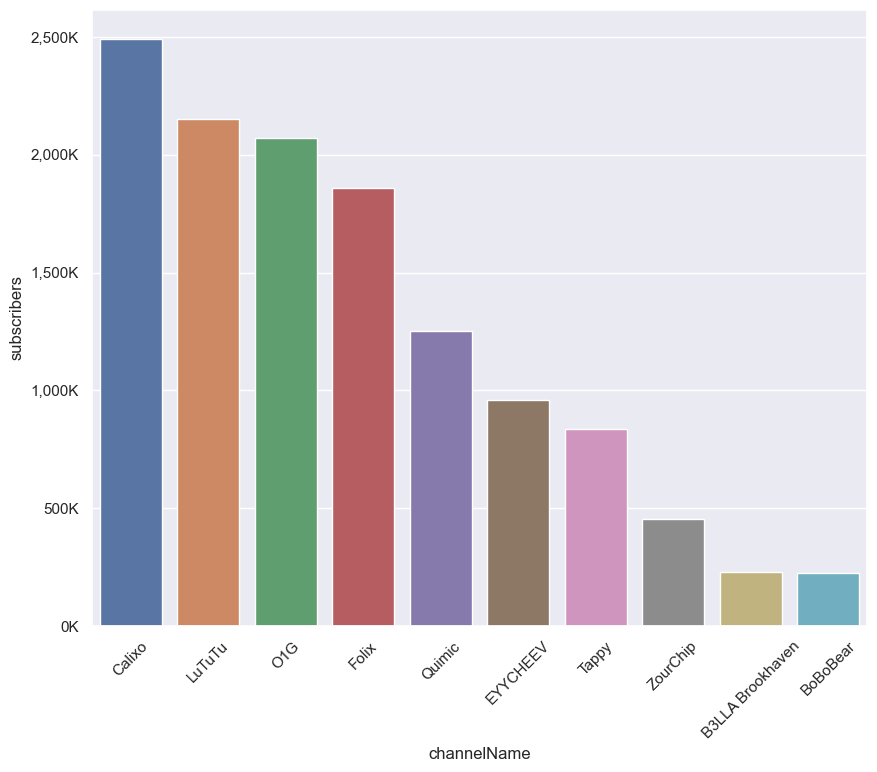

In [107]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelName', y='subscribers', data=channel_data.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

Tạo biểu đồ dựa trên tổng số lượt xem của các kênh. Xếp hạng này khá tương đồng với biểu đồ về số lượng Sub. 
- CALIXO, LUTUTU, O1G và Folix vẫn là 4 kênh phổ biến nhất xét về cả người đăng ký và lượt xem.
- Có một điểm đặc biệt có thể dễ dàng nhận thấy:
    - Một số kênh có nhiều người đăng ký hơn nhưng lại có ít lượt xem hơn, và ngược lại. Ví dụ, kênh LUTUTU có số người đăng ký nhiều hơn đáng kể so với kênh O1G, nhưng tổng số lượt xem lại ít hơn.
    - Kênh Tappy có số lượt sub đứng thứ 7 nhưng nằm trong top 5 kênh có lượt xem lớn nhất.
    - Kênh Quimic mặc dù có số lượt sub đứng top 5, tuy nhiên chỉ đứng thứ 8 về số lượt xem

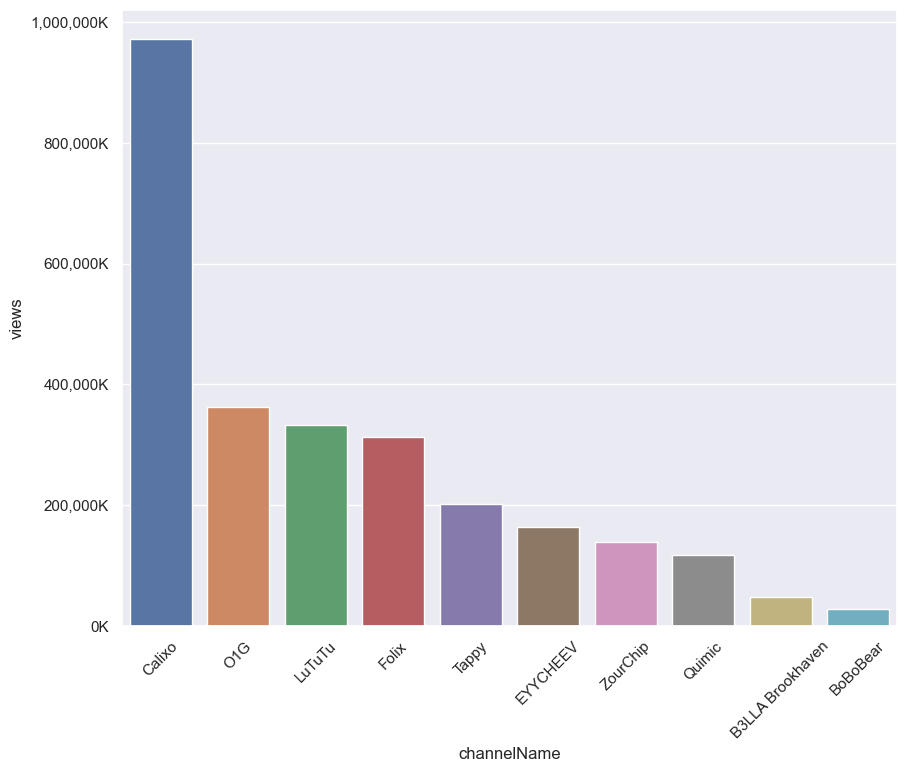

In [108]:
ax = sns.barplot(x='channelName', y='views', data=channel_data.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

### Lấy số liệu thống kê cụ thể của tất cả các kênh

Lấy số liệu thống kê về videos của các kênh. Có tổng 6866 videos, và thông tin của các videos đó

In [16]:
import pandas as pd
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = get_video_details(youtube, video_ids)
    # get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)

    # Append video data to video dataframe
    video_df = pd.concat([video_df, video_data], ignore_index=True)

    # Append comment data to comments dataframe
    comments_df = pd.concat([comments_df, comments_data], ignore_index=True)

Getting video information from channel: LuTuTu
Could not get comments for video AP4MvOm0zIc
Getting video information from channel: EYYCHEEV
Getting video information from channel: ZourChip
Could not get comments for video 87-6PiHwUqc
Getting video information from channel: Quimic
Could not get comments for video QTaUnMhc1MQ
Getting video information from channel: Folix
Getting video information from channel: Tappy
Getting video information from channel: BoBoBear
Getting video information from channel: O1G
Could not get comments for video Ej8hgsopVg0
Could not get comments for video dQtJ2Edd9dA
Could not get comments for video 6Xm20XcOszY
Could not get comments for video umKJGue1cUg
Getting video information from channel: B3LLA Brookhaven
Getting video information from channel: Calixo
Could not get comments for video AemTKwrpmso
Could not get comments for video BjNkyNLGcPc
Could not get comments for video OuyfWqhQ4Ww
Could not get comments for video x3xLXYhBYPY
Could not get comments f

In [17]:
video_df # Bảng dữ liệu về videos

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,5KNNYGo1WMo,LuTuTu,BEST EPISODES COMPILATION 19 / ROBLOX Brookhav...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-21T12:00:07Z,286673,4715,None,680,PT1H2M37S,hd,false
1,FVNdQ-c-4_c,LuTuTu,NEED MORE HEAT 🔥🔥🔥 (ROBLOX Brookhaven 🏡RP - FU...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-20T12:00:07Z,160592,4087,None,663,PT8M54S,hd,false
2,QcpkitemtL0,LuTuTu,THE GOOD ROBBER 👮 💰 (ROBLOX Brookhaven 🏡RP - ...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-13T13:00:07Z,362725,7511,None,964,PT11M32S,hd,false
3,p_dlBL8ehYY,LuTuTu,THE NEW PRESIDENT (ROBLOX Brookhaven 🏡RP - FUN...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-06T12:00:07Z,369003,8175,None,1195,PT11M8S,hd,false
4,PphS-2uOENE,LuTuTu,"FAREWELL, BACON (ROBLOX Brookhaven 🏡RP - FUNNY...",➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-03-30T12:00:06Z,384818,9911,None,2824,PT10M30S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,CR2EWTQv_8o,Calixo,HOW TO BE A GIANT BLOWFISH IN ROBLOXIAN HIGHSC...,HOW TO BE A GIANT BLOWFISH IN ROBLOXIAN HIGHSC...,"[calixo, how to be a blowfish, how to be a sha...",2018-04-29T10:30:00Z,36817,542,None,224,PT6M7S,hd,false
6862,0U602W-b-bs,Calixo,HOW TO BE A GIANT BALD EAGLE IN ROBLOXIAN HIGH...,HOW TO BE A GIANT BALD EAGLE IN ROBLOXIAN HIGH...,"[CALIXO, calixo, HOW TO BE THE HULK IN ROBLOXI...",2018-04-28T10:30:01Z,62953,908,None,327,PT8M39S,hd,false
6863,oO-A39FBkWo,Calixo,HOW TO BE A SHARK IN ROBLOXIAN HIGHSCHOOL!!,HOW TO BE A SHARK IN ROBLOXIAN HIGHSCHOOL!!\n▶...,"[calixo, how to be a shark, CALIXO, HOW TO BE ...",2018-04-27T10:30:03Z,532845,4751,None,684,PT8M21S,hd,false
6864,RUJSJrDGz-c,Calixo,HOW TO BE A MINION IN ROBLOXIAN HIGHSCHOOL!!,HOW TO BE A MINION IN ROBLOXIAN HIGHSCHOOL!!\n...,"[HOW TO BE A MINION IN ROBLOXIAN HIGHSCHOOL!!,...",2018-04-26T14:00:04Z,69103,867,None,265,PT9M3S,hd,false


Bảng dữ liệu `comment_df`. Tổng số bình luận chỉ có 6.844 do chỉ lấy 10 bình luận đầu tiên của mỗi video để tránh vượt quá hạn ngạch của Youtube API.

In [18]:
comments_df

,video_id,comments
0,5KNNYGo1WMo,"[Luca deserves 99m subs, Lututu always finds a..."
1,FVNdQ-c-4_c,[This is that smoothest animation I’ve ever se...
2,QcpkitemtL0,"[5:31 THE INTRO OF I MISS THE WAGE, I hate thi..."
3,p_dlBL8ehYY,[Yo yo yo it's hump day !! @Treywei uploaded n...
4,PphS-2uOENE,[Bacon is alive and well. He just farts a lot ...
...,...,...
6839,CR2EWTQv_8o,"[Just add carrots to be puffer fish meme, You'..."
6840,0U602W-b-bs,"[Ig im the newest comment, can you do how to b..."
6841,oO-A39FBkWo,[I won’t post my opinion in the comments becau...
6842,RUJSJrDGz-c,[It looked better when it didn't have a smile ...


In [19]:
# Xuất file CSV
video_df.to_csv('video_data_top10_channels.csv')
comments_df.to_csv('comments_data_top10_channels.csv')

## Xử lý dữ liệu

Dữ liệu lấy được là dữ liệu thô, cần vài bước tiền xử lý

### Kiểm tra các giá trị rỗng

In [20]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [21]:
video_df.publishedAt.sort_values().value_counts()

publishedAt
2022-12-15T12:00:07Z    2
2011-01-01T22:11:27Z    1
2022-08-25T12:00:14Z    1
2022-08-27T20:41:08Z    1
2022-08-27T16:53:10Z    1
                       ..
2020-08-27T17:00:11Z    1
2020-08-27T16:36:13Z    1
2020-08-27T15:34:32Z    1
2020-08-26T17:00:11Z    1
2024-04-25T04:45:02Z    1
Name: count, Length: 6865, dtype: int64

Tiếp theo, cần kiểm tra kiểu dữ liệu của các cột. Một số cột đếm như số lượt xem và số bình luận hiện không có kiểu dữ liệu chính xác. Chuyển đổi các cột đếm này thành số nguyên (int).

In [22]:
cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Biến đổi dữ liệu

Biến đổi dữ liệu như sau:

- Tạo thêm cột hiển thị ngày xuất bản trong tuần (Thứ 2, Thứ 3,..,Chủ nhật)

- Chuyển đổi thời lượng videos thành giây

- Đếm số lượng tags của mỗi video

- Tính toán tỷ lệ bình luận và lượt thích trên 1000 lượt xem

- Tính độ dài ký tự tiêu đề videos

In [23]:
# Tạo thêm cột hiển thị ngày xuất bản trong tuần (Thứ 2, Thứ 3,..,Chủ nhật)
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [24]:
# Chuyển đổi thời lượng videos thành giây
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [25]:
# Đếm số lượng tags của mỗi video
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [26]:
# Tính toán tỷ lệ bình luận và lượt thích trên 1000 lượt xem
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [27]:
# Tính độ dài ký tự tiêu đề videos
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [28]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,5KNNYGo1WMo,LuTuTu,BEST EPISODES COMPILATION 19 / ROBLOX Brookhav...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-21 12:00:07+00:00,286673.0,4715.0,NaN,680.0,PT1H2M37S,hd,false,Sunday,0 days 01:02:37,23,16.447311,2.372041,68
1,FVNdQ-c-4_c,LuTuTu,NEED MORE HEAT 🔥🔥🔥 (ROBLOX Brookhaven 🏡RP - FU...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-20 12:00:07+00:00,160592.0,4087.0,NaN,663.0,PT8M54S,hd,false,Saturday,0 days 00:08:54,23,25.449587,4.128475,58
2,QcpkitemtL0,LuTuTu,THE GOOD ROBBER 👮 💰 (ROBLOX Brookhaven 🏡RP - ...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-13 13:00:07+00:00,362725.0,7511.0,NaN,964.0,PT11M32S,hd,false,Saturday,0 days 00:11:32,23,20.707147,2.657661,60
3,p_dlBL8ehYY,LuTuTu,THE NEW PRESIDENT (ROBLOX Brookhaven 🏡RP - FUN...,➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-04-06 12:00:07+00:00,369003.0,8175.0,NaN,1195.0,PT11M8S,hd,false,Saturday,0 days 00:11:08,23,22.154291,3.238456,57
4,PphS-2uOENE,LuTuTu,"FAREWELL, BACON (ROBLOX Brookhaven 🏡RP - FUNNY...",➤ Support me: https://www.roblox.com/games/146...,"[lututu roblox, luca roblox, roblox mini movie...",2024-03-30 12:00:06+00:00,384818.0,9911.0,NaN,2824.0,PT10M30S,hd,false,Saturday,0 days 00:10:30,23,25.755032,7.338534,55


## Phân tích tổng quan

### Phân phối lượt xem trên mỗi kênh

Dựa vào số liệu thông kê videos của tất cả các kênh, biểu đồ xác định được lượt xem được phân bổ như thế nào trên từng kênh.
- Một số kênh có thể có nhiều lượt xem trên một trong các videos của họ, ngược lại một số kênh không nhận về nhiều lượt xem
- Một số kênh có sự phân bố đồng đều về lượt xem hơn trên mỗi videos
- LuTuTu, Folix là những kênh có sự khác biệt lớn, họ có 1 vài videos thực sự viral, thu hút lượt xem đông đảo
- B3LLA Brookhaven một kênh có lượt xem, lượt sub ít hơn các kênh còn lại. Tuy nhiên nhìn vào biểu đồ phân phối có thể nhận thấy họ đã có 1 vài videos tạo ra xu hướng.
- BoBoBear không thực sự có nhiều lượt xem, nhưng lượt xem của họ có sự ổn định và nhất quán 

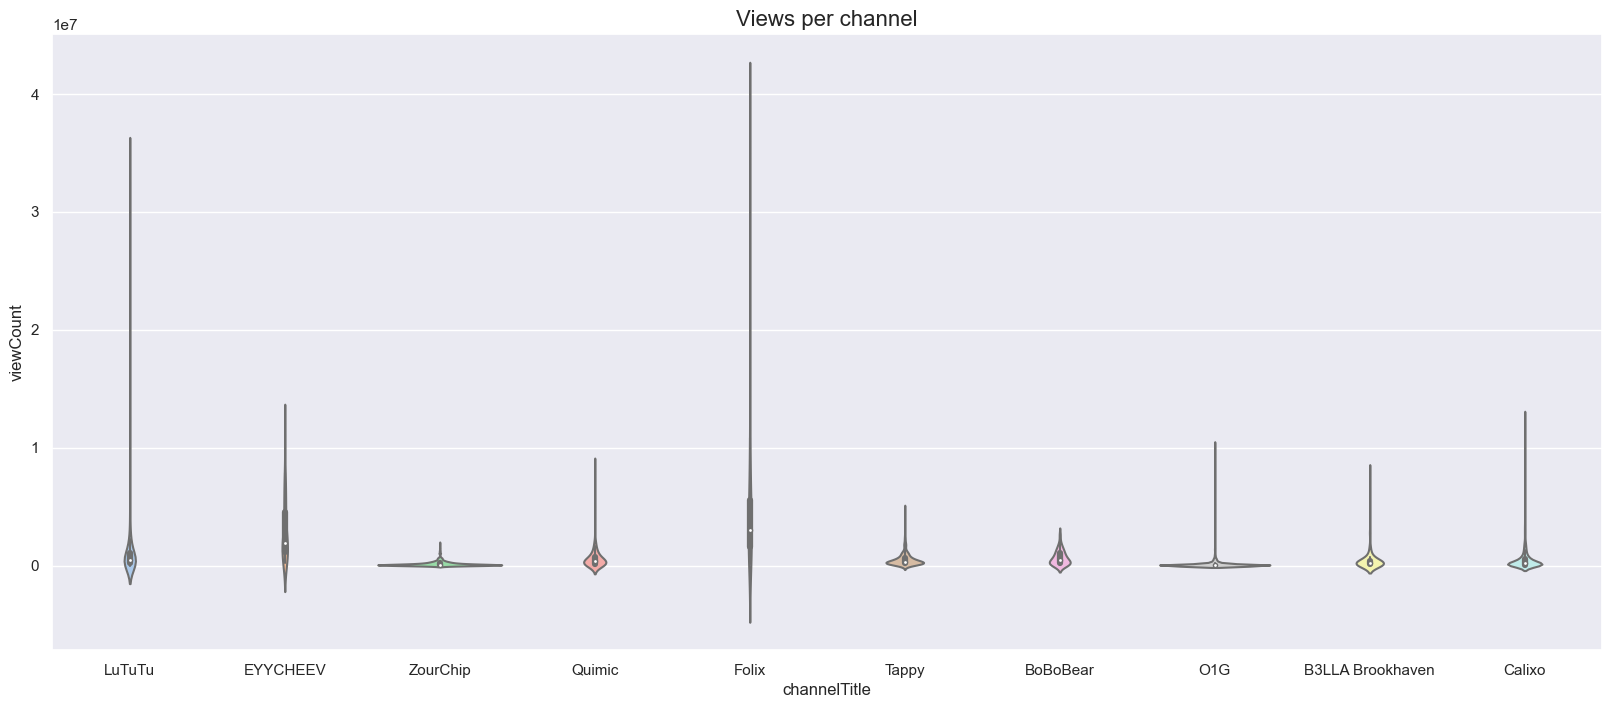

In [114]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(x = "channelTitle", y = "viewCount", data=video_df, palette="pastel")
plt.title('Views per channel', fontsize=16)
plt.show()

### Số lượt thích và bình luận có ảnh hưởng đến lượt xem videos?

Tương quan giữa lượt thích, lượt bình luận videos với số lượt xem

Biểu đồ 1: Số lượng lượt bình luận và số lượng lượt xem

- Mối quan hệ: Biểu đồ cho thấy có một mối quan hệ tương quan dương giữa số lượng lượt bình luận và số lượng lượt xem. Điều này có nghĩa là khi số lượng lượt bình luận tăng, số lượng lượt xem cũng có xu hướng tăng.
- Phân bố dữ liệu: Dữ liệu được phân bố tương đối đều trên biểu đồ, với một số cụm mật độ cao hơn ở các góc trên bên phải. Điều này cho thấy rằng có nhiều video có số lượng lượt bình luận và lượt xem cao.
- Có một số video có số lượng lượt bình luận cao nhưng số lượng lượt xem thấp. Điều này có thể là do các video này tạo ra nhiều tranh luận hoặc do chúng thu hút sự chú ý từ những người có ảnh hưởng.

Biểu đồ 2: Số lượng lượt thích và số lượng lượt xem

- Mối quan hệ: Biểu đồ cho thấy có một mối quan hệ tương quan dương giữa số lượng lượt thích và số lượng lượt xem. Điều này có nghĩa là khi số lượng lượt thích tăng, số lượng lượt xem cũng có xu hướng tăng.
- Phân bố dữ liệu: Dữ liệu được phân bố tương đối đều trên biểu đồ, với một số cụm mật độ cao hơn ở các góc trên bên phải. Điều này cho thấy rằng có nhiều video có số lượng lượt thích và lượt xem cao.
- Có một số video có số lượng lượt thích cao nhưng số lượng lượt xem thấp. Điều này có thể là do các video này được chia sẻ rộng rãi trên mạng xã hội hoặc do chúng thu hút sự chú ý từ những người nổi tiếng.

Có thể thấy số lượt thích videos có mức độ tương quan với số lượt xem lớn hơn số lượt bình luận.



<Axes: xlabel='likeCount', ylabel='viewCount'>

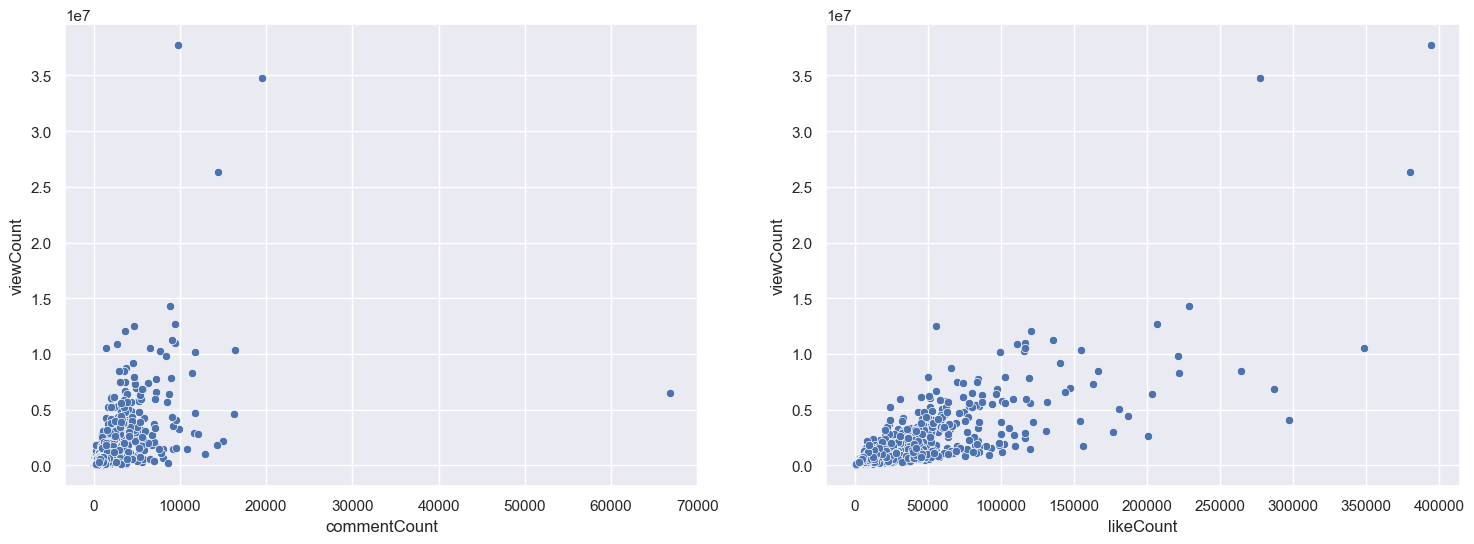

In [32]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

Kiểm tra lại mức độ tương quan, điều chỉnh dữ liệu bằng cách sử dụng tỷ lệ bình luận/1000 lượt xem và tỷ lệ lượt thích/1000 lượt xem

<Axes: xlabel='likeRatio', ylabel='viewCount'>

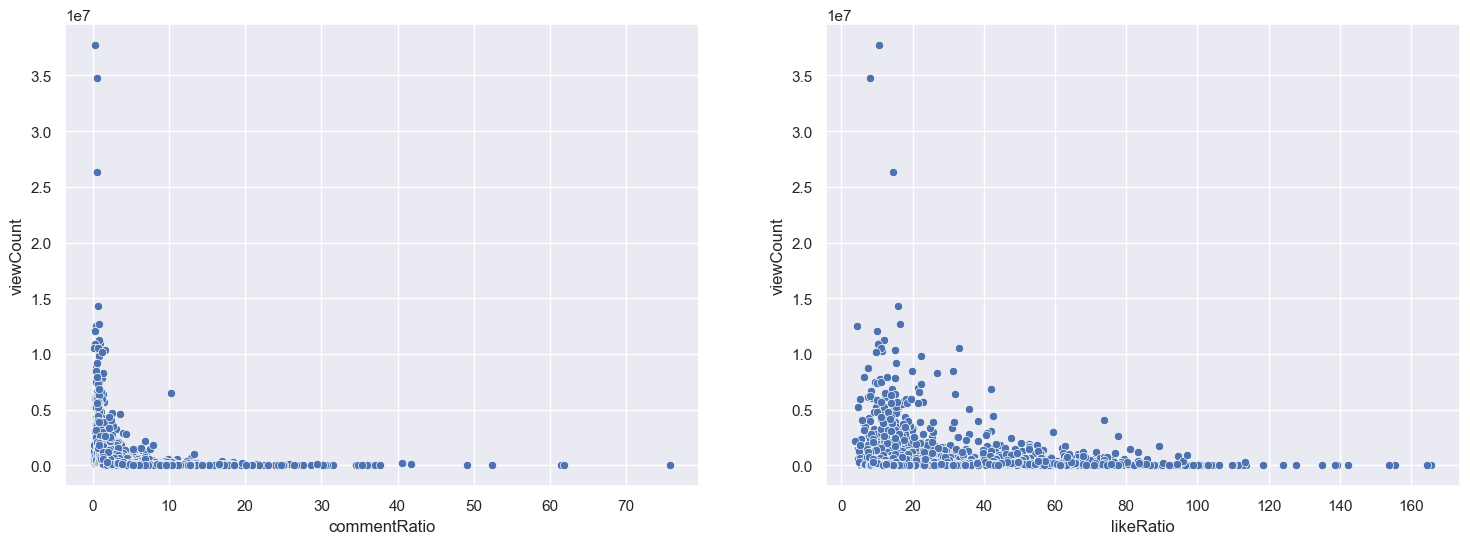

In [33]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[1])

Sau khi đều chỉnh, có thể nhận thấy:
- Mối quan hệ giữa lượt bình luận và lượt xem gần như không còn: rất nhiều videos thu hút số lượt xem lớn nhưng có rất ít bình luận, trong khi một số videos có rất ít lượt xem lại có khả năng tương tác tốt hơn. Có thể hiểu rằng, hành vi của người xem thường không có thói quen để lại bình luận ở dưới mỗi video, bằng một hay vài lý do nào đó. Có thể là việc để lại bình luận sẽ mất nhiều thao tác hơn là lượt bấm thích videos.
- Mối quan hệ tương quan giữa lượt thích và lượt xem vẫn cho ta thấy một số điểm tích cực hơn: Videos càng nhiều lượt xem thì thường sẽ có nhiều người thích! 

#### Thời lượng videos ảnh hưởng thế nào đến lượt xem và lượt tương tác (lượt thích/ lượt bình luận)?

Với biểu đồ bên dưới. ta có thể thấy hầu hết video có thời lượng từ 500 đến 800 giây, khoảng 8 đến 13 phút trên một video. 

D:\anaconda\envs\DA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='durationSecs', ylabel='Count'>

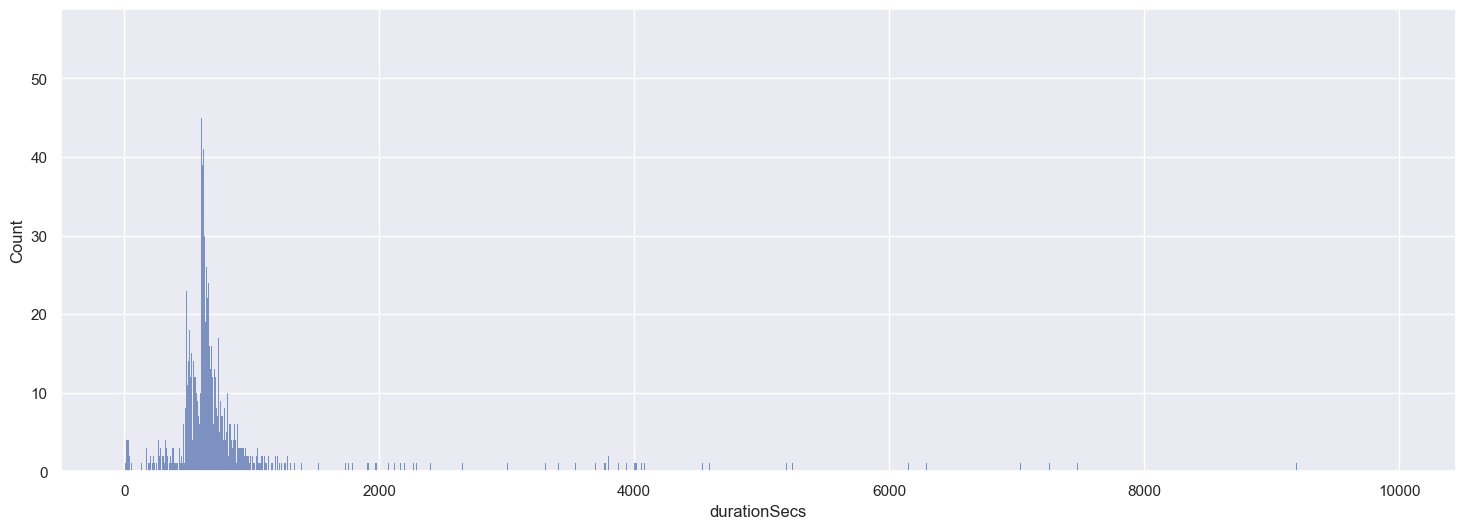

In [35]:
# Convert duration to seconds (assuming durationSecs is timedelta)
video_df_filtered = video_df[video_df['durationSecs'].dt.total_seconds() < 10000]
sns.histplot(data=video_df_filtered, x="durationSecs", bins=30)

Biểu đồ tương quan giữa thời lượng video và lượt tương tác(lượt bình luận/ lượt thích):
- Các video có thời lượng lớn thu hút lượt bình luận nhiều hơn
- Điều ngược lại với lượt thích, videos có thời lượng lớn thu hút lượt thích kém hơn

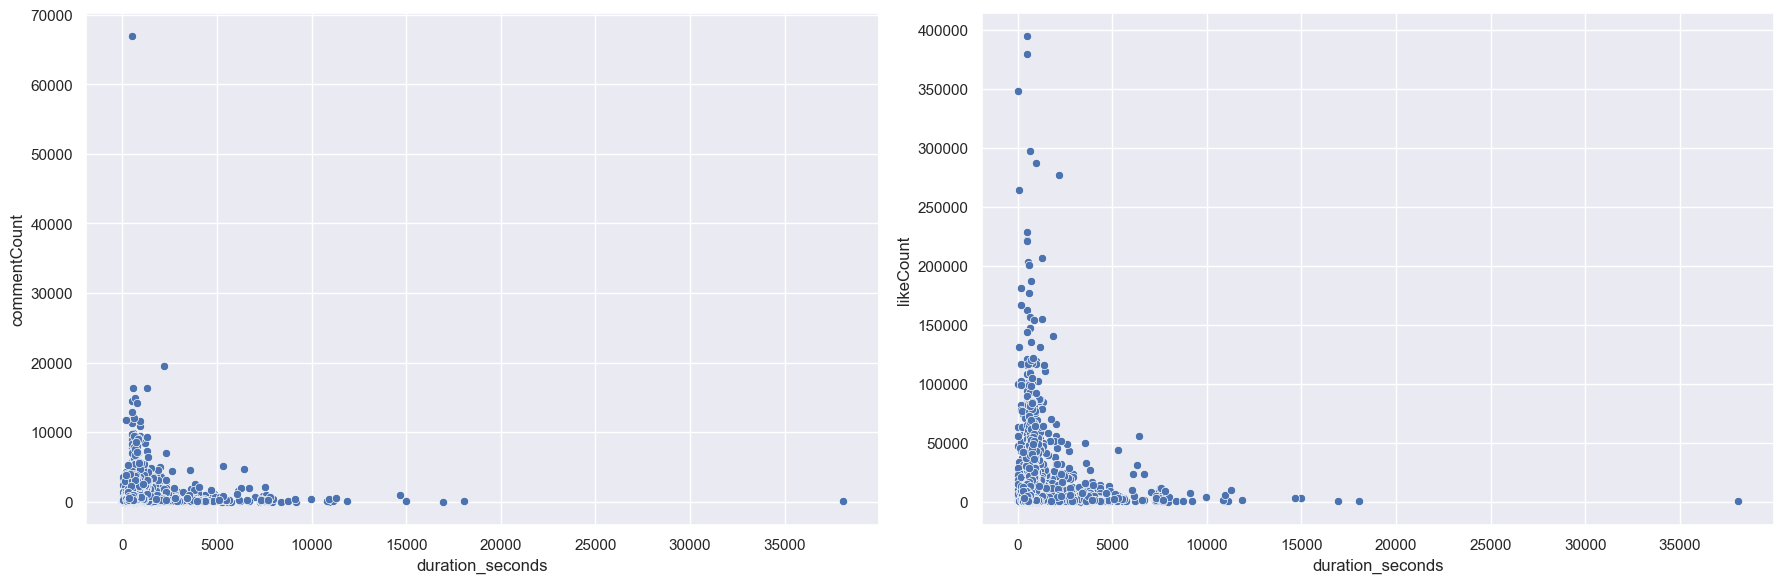

In [40]:
fig, ax = plt.subplots(1, 2)

# Tính thời lượng đơn vị giây
video_df['duration_seconds'] = video_df['durationSecs'].dt.total_seconds()

sns.scatterplot(data=video_df, x="duration_seconds", y="commentCount", ax=ax[0])
sns.scatterplot(data=video_df, x="duration_seconds", y="likeCount", ax=ax[1])
plt.tight_layout()

### Độ dài tiêu đề có ảnh hưởng đến lượt xem?

Không có mối quan hệ rõ ràng giữa độ dài tiêu đề với lượt xem. Tuy nhiên có thể nhận thấy các videos có nhiều lượt xem nhất, độ dài tiêu đề trung bình giao động từ 40 - 75 ký tự.

<Axes: xlabel='titleLength', ylabel='viewCount'>

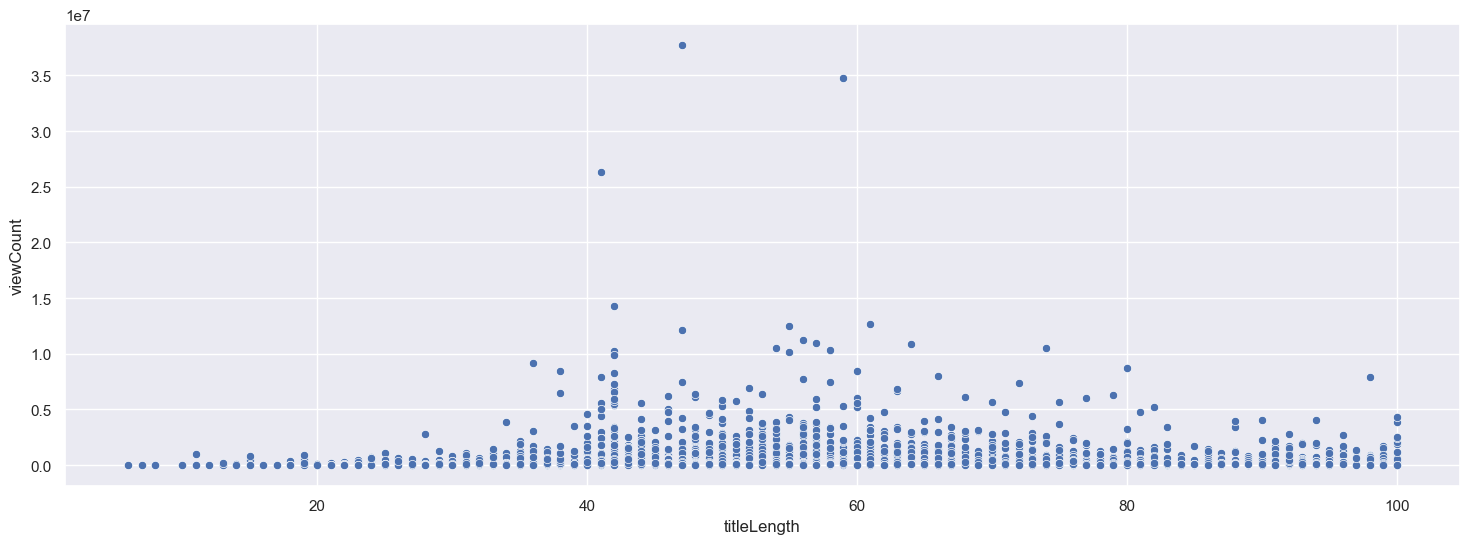

In [41]:
sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount")

### Wordcloud cho các từ có trong tiêu đề videos

Điều này cho ta biết những người sáng tạo nội dung đang tạo videos về chủ đề gì, những từ ngữ phổ biến xuất hiện nhiều nhất trong tiêu đề videos của họ

In [42]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

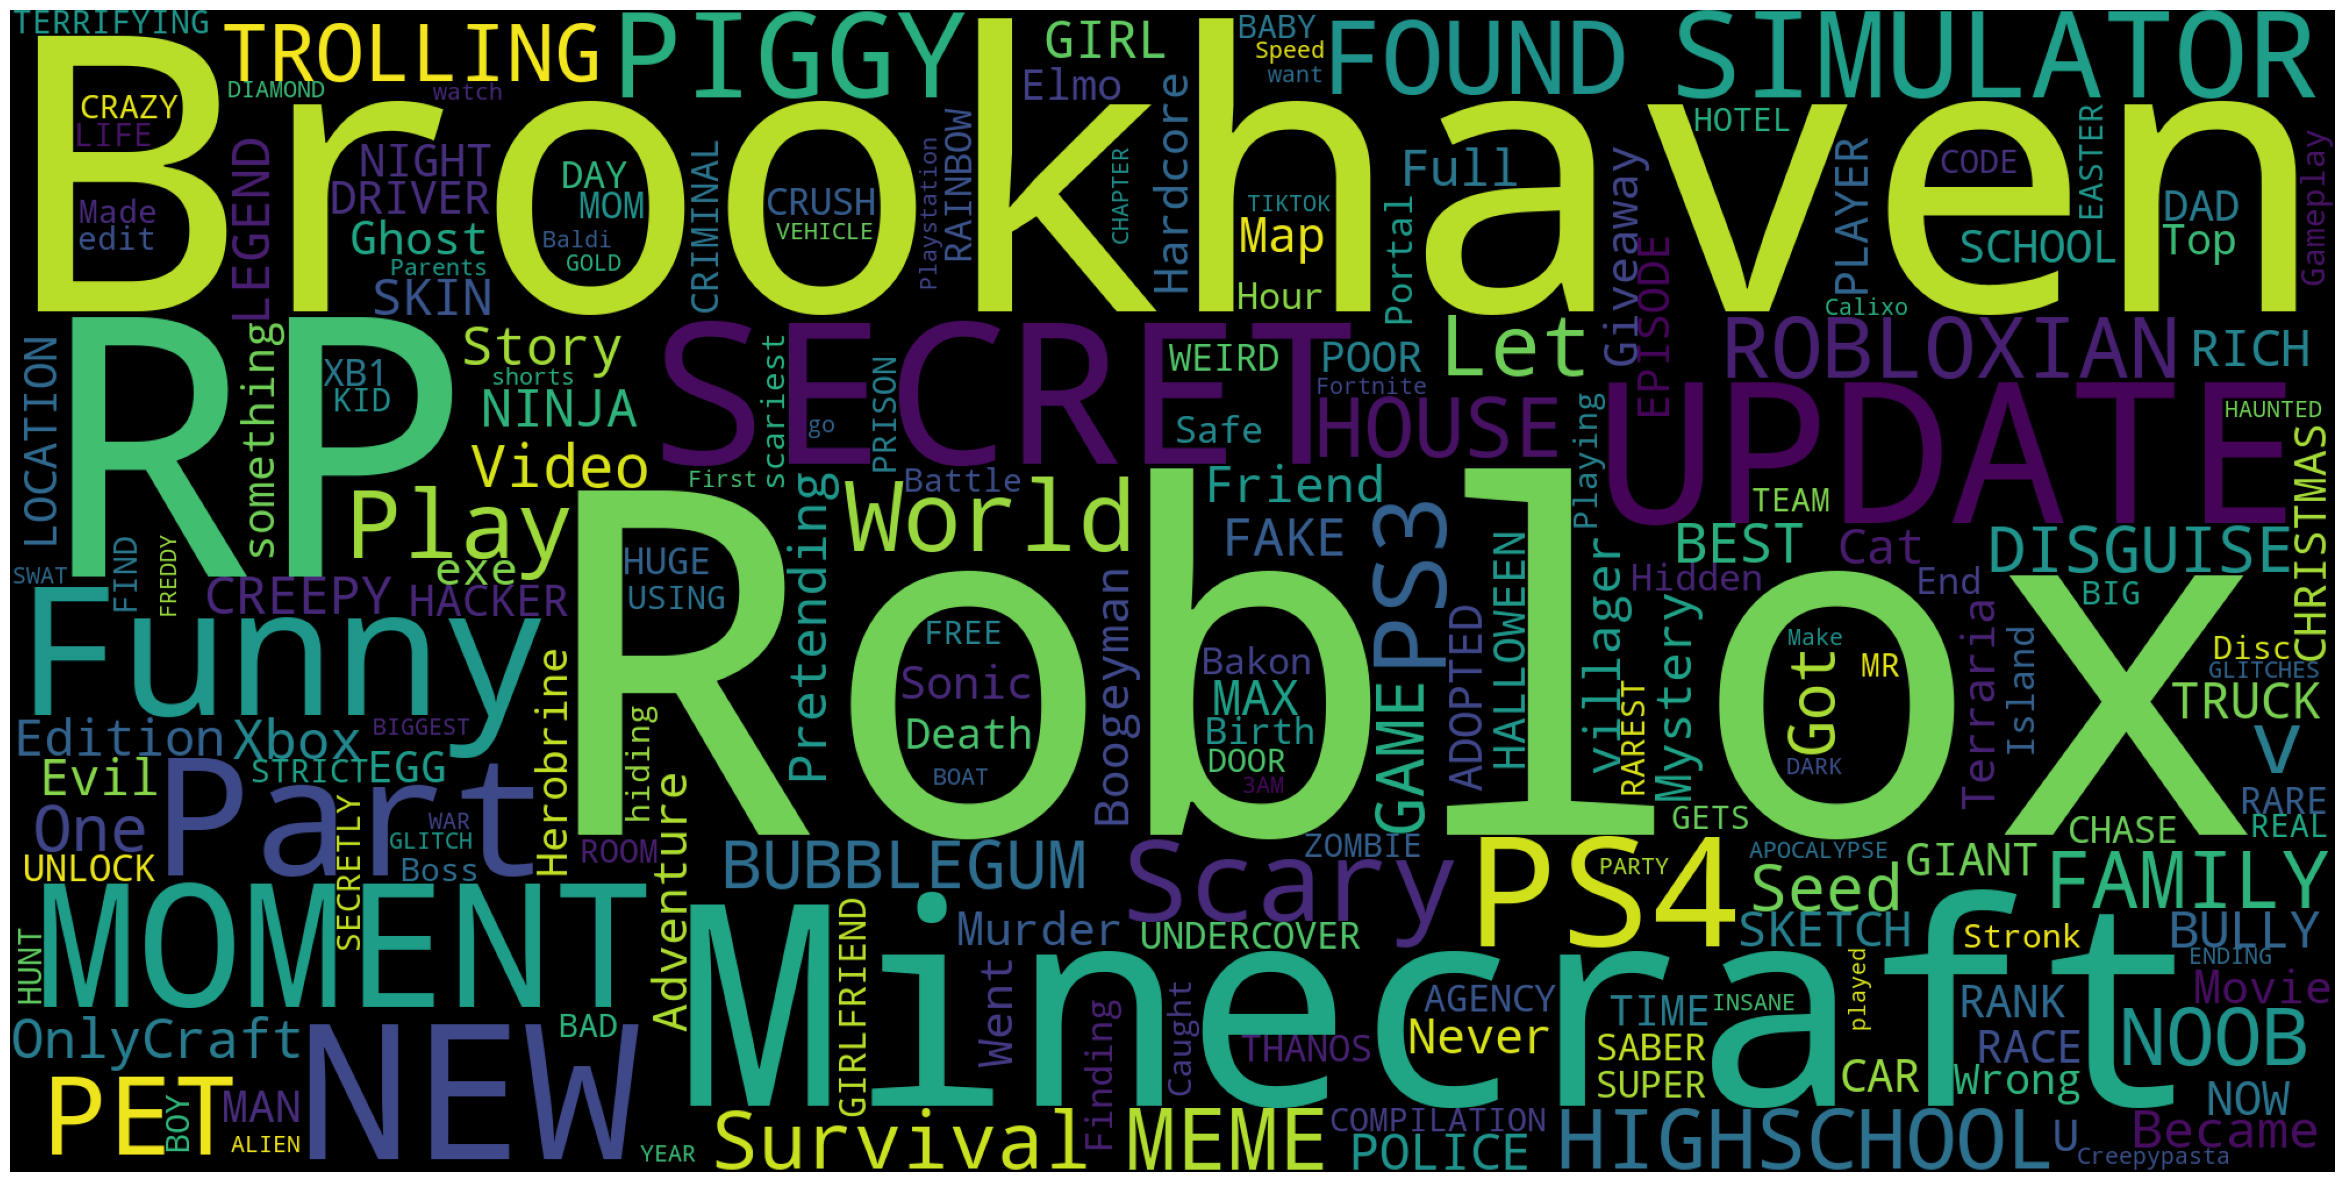

In [43]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

Có thể thấy những từ ngữ phổ biến như ROBLOX, BROOKHAVEN, MINECRAFT.

### Số lượng Tags với lượt xem

Số lượng tags từ 18 - 24 có ảnh hưởng nhiều hơn đến số lượt xem videos. 

<Axes: xlabel='tagsCount', ylabel='viewCount'>

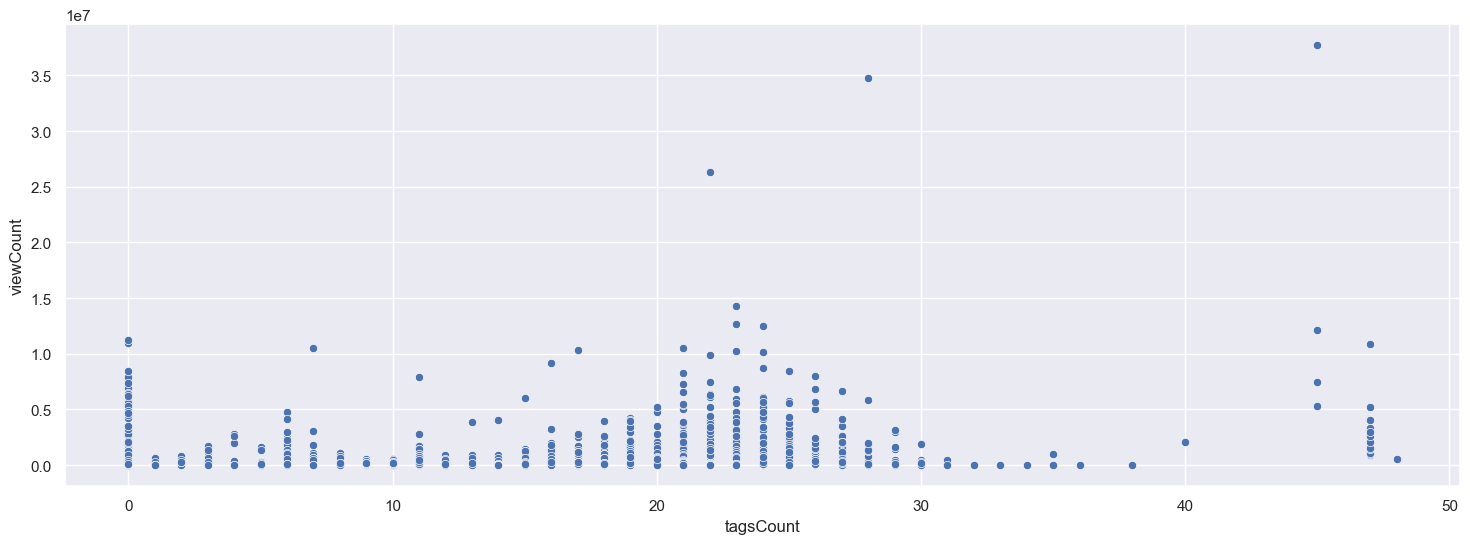

In [44]:
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount")

### Ngày nào trong tuần có nhiều videos được uploaded nhất?

- Số lượng videos được uploaded trong tuần nhiều nhất vào Thứ 7
- Hai ngày Thứ 6 và thứ 4 cũng có số lượng videos được uploaded nhiều. Chênh lệch giữa 2 ngày này không quá lớn, chỉ khoảng 20 videos.
- Thứ 5 có số lượt uploaded videos thấp nhất.

In [141]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())

In [142]:
day_df

,count
pushblishDayName,
Saturday,1145
Friday,1042
Wednesday,1022
Sunday,953
Tuesday,911
Monday,897
Thursday,896


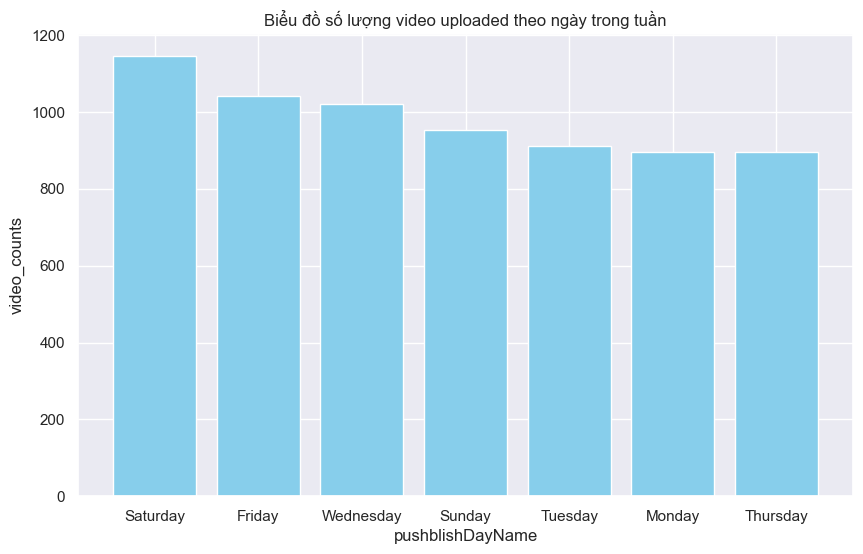

In [149]:
days_of_week = ['Saturday', 'Friday', 'Wednesday', 'Sunday', 'Tuesday', 'Monday', 'Thursday']
video_counts = [1145, 1042, 1022, 953, 911, 897, 896]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, video_counts, color='skyblue')
plt.xlabel('pushblishDayName')
plt.ylabel('video_counts')
plt.title('Biểu đồ số lượng video uploaded theo ngày trong tuần')
plt.show()


### Wordcloud cho các từ có trong bình luận

Xem nhưng từ được nhắc thường xuyên trong phần bình luận

In [60]:
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

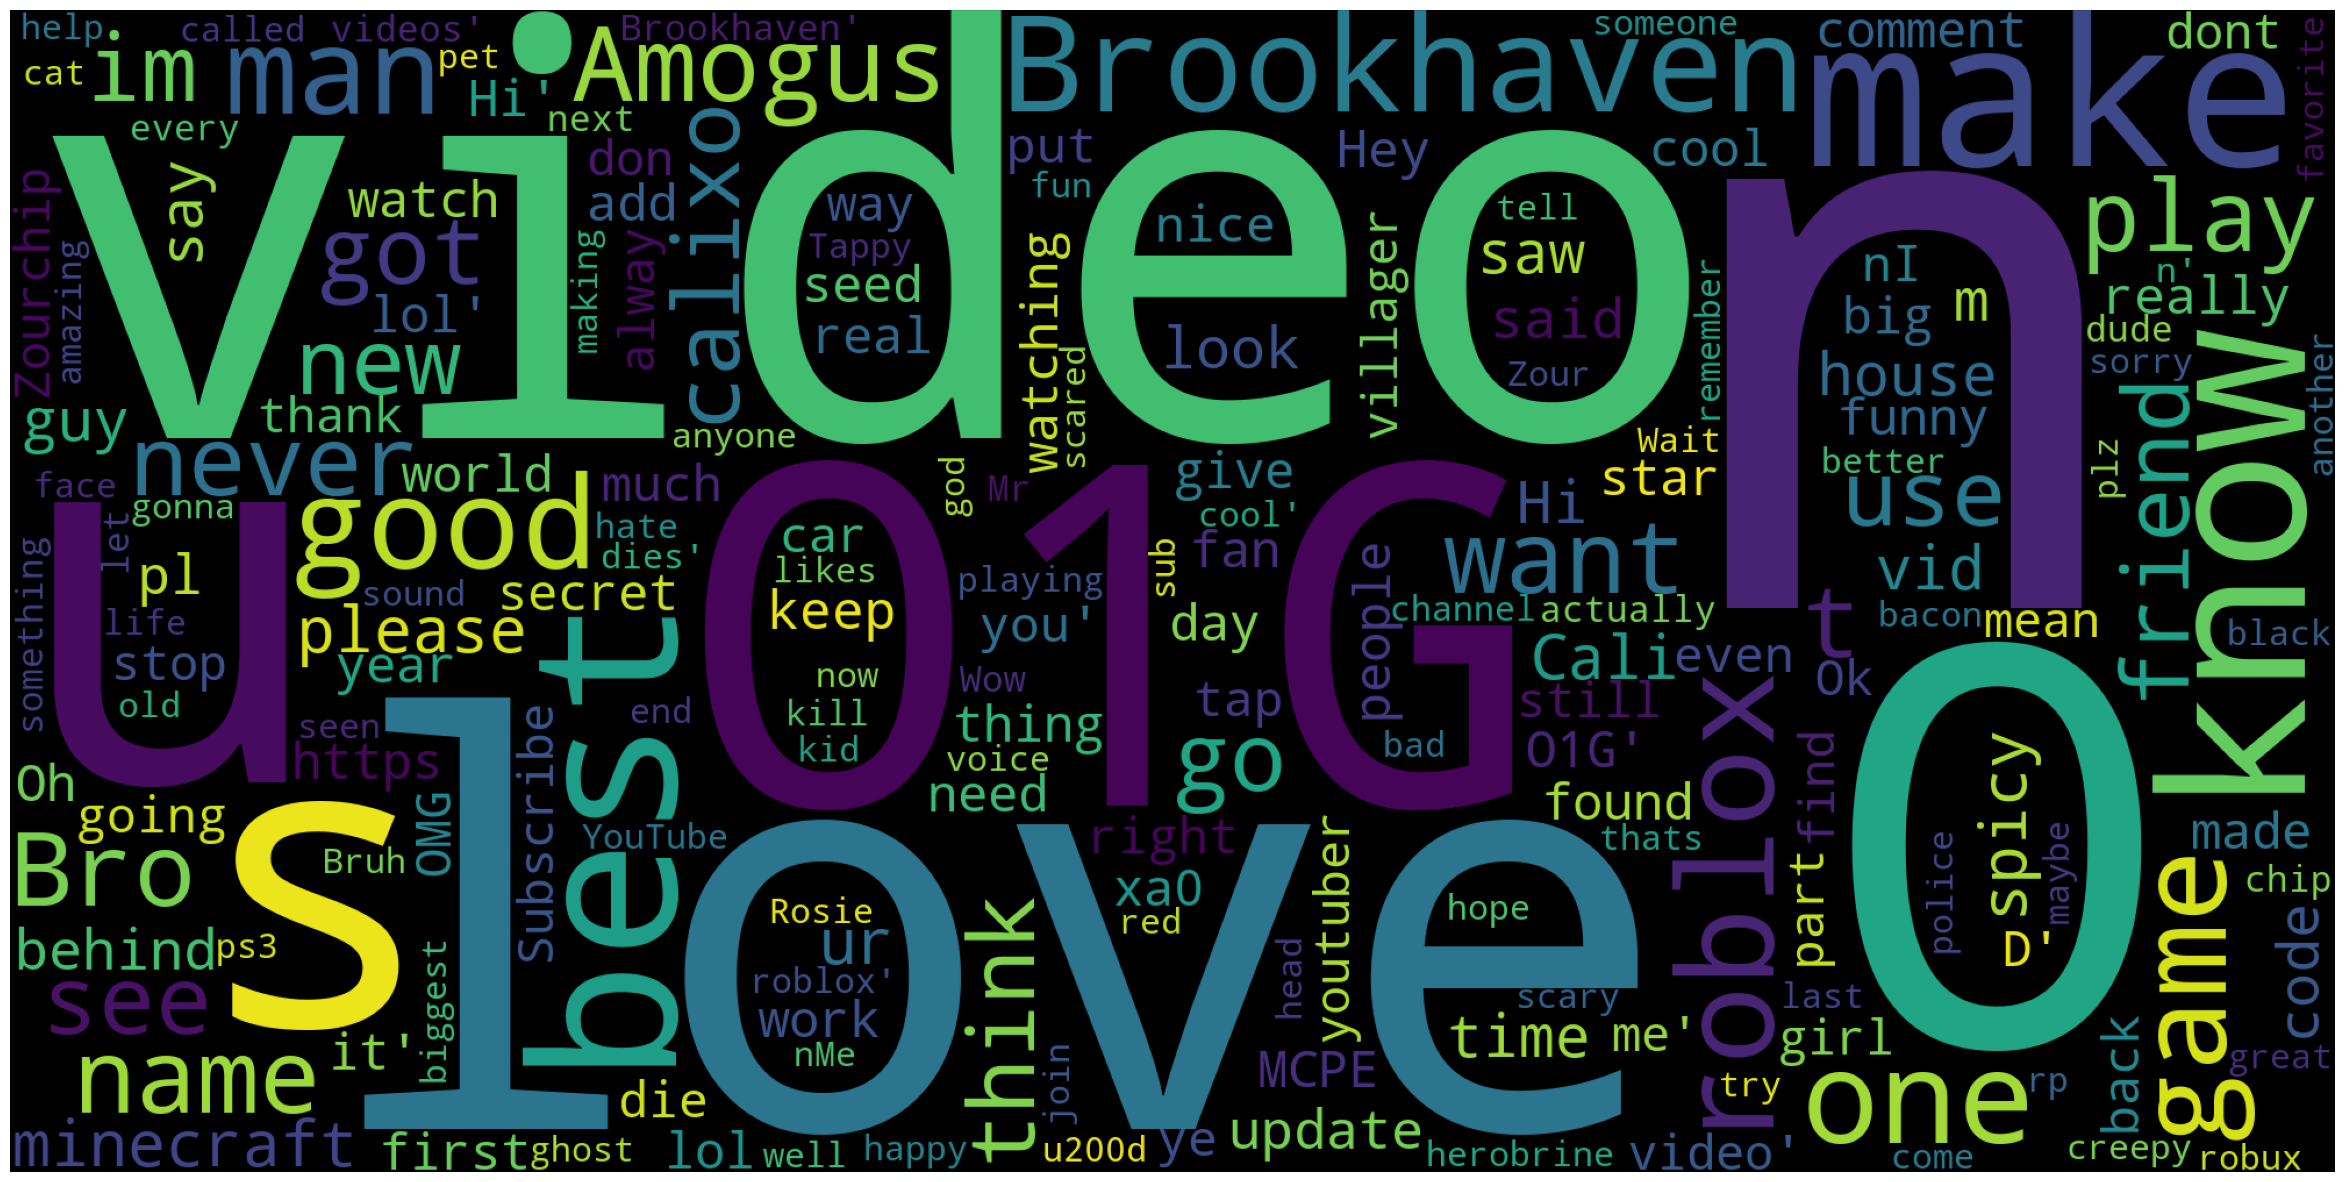

In [61]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

- Ngoài từ "VIDEO" và một số ký tự "N", "U" thì tín hiệu của người xem khá là tích cực với nội dung. Ví dụ "LOVE", "GOOD", "BEST".
- Có tên của một kênh youtube được nhắc tới nhiều "O1G"

## Kết luận

Projects này phân tích theo yêu cầu của một công ty làm nội dung về game ROBLOX dành cho trẻ em từ 5-14 tuổi trên youtube. 
- Dữ liệu phân tích dựa trên các 10 kênh youtube có thị phần lớn về lĩnh vực này
- Một số insights được rút ra:
   -  Video nhận về nhiều lượt bình luận không chắc đã là một video có nội dung chất lượng
   -  Hành vi của đa số người xem thường chỉ thích và rất ít để lại bình luận khi xem video
   -  Hầu hết các videos có số lượng xem lớn thì số lượng Tags từ 18 - 24 
   -  Các videos được xem nhiều nhất thường có độ dài tiêu đề từ 40 - 75 ký tự. Độ dài tiêu đề ngắn hơn hoặc dài hơn kém hấp dẫn hơn với người xem, đặc biệt là các videos có tiêu đề ngắn.
   -  Videos thường được uploaded nhiều nhất vào 3 ngày Thứ 7, Thứ 6 và Thứ 4 hàng tuần
   -  Tiêu đề videos thường đề cập trực tiếp về Roblox, Brookhaven
   -  Lượt bình luận về videos khá tích cực, không có quá nhiều insights được nhắc đến

**Một số vấn đề:**

Do giới hạn của Youtube API nên giới hạn về data khá lớn
- Bài phân tích chỉ được đánh giá dựa trên 10 kênh youtube cụ thể, có thể sẽ không đưa ra được hết các vấn đề về nội dung này
- Một số dữ liệu về tỷ lệ xem theo ngày, giờ sẽ không thể hiện để có thể phân tích
- Giới hạn về dữ liệu bình luận thu thập được

### Nguồn tham khảo:

[1] Youtube API. https://developers.google.com/youtube/v3

[2] Chuyển đổi thời lượng videos. https://stackoverflow.com/questions/15596753/how-do-i-get-video-durations-with-youtube-api-version-3

[3] Youtube API for Python: How to Create a Unique Data Portfolio Project. https://youtu.be/D56_Cx36oGY

[4] How to Create a YouTube API Key - Step By Step Tutorial https://youtu.be/uz7dY8qTFJw?si=NHtIgH00xfutq11-